In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import math, random
from matplotlib import pyplot as plt, gridspec
import seaborn as sns
import statsmodels.api as sm
import itertools

%matplotlib inline

# Chapter 10 - Cross-tabulations

## Formulas

**Chi-squared goodness-of-fit test**

$$H_0: \pi_1 = \pi_{10}, \pi_2 = \pi_{20}, ..., \pi_c = \pi_{c0}$$

where $c$ is the number of categories fot the variable.

Test statistic:

$$x^2 = \sum_{j=1}^c\frac{(O_j - E_j)^2}{E_j}$$

where $O_j$ is the observed count in category $j$ and $E_j$ is the expected count, assuming the null hypothesis is true. The expected count is:

$$E_j = n\pi_j$$

The chi-squared test is calculated with degrees of freedom equal to: $v = c-1$ where $c$ is the number of categories

**Chi-squared goodnes-of-fit for multiple categories**

$$H_0: \pi_{11} = \pi_{21}, \pi_{12} = \pi_{22}, ..., \pi_1c = \pi_{2c}$$

Test statistic:

$$x^2 = \sum_{j=1}^c\frac{(O_{1j} - E_{1j})^2}{E_{1j}}+\sum_{j=1}^c\frac{(O_{2j} - E_{2j})^2}{E_{2j}}$$

where $O$ is the observed count and $E$ is the expected count, assuming the null hypothesis is true. The expected count is:

$$E_{1j} = \frac{(O_{1j}+O_{2j})\sum_{j=1}^c)O_{1j}}{n}, E_{2j} = \frac{(O_{2j}+O_{2j})\sum_{j=1}^c)O_{2j}}{n}$$

The chi-squared test is calculated with degrees of freedom equal to: $v = c-1$ where $c$ is the number of categories

**Chi-squared test for independence**

$$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$$

where $O_{ij}$ is the observed count in category $i$ of the determinant and category $j$ of the outcome, and $E_{ij}$ is the corresponding expected count.

$$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$$

with $v = (r-1)(c-1)$ degrees of freedom.

**Population odds ratio**

$$\omega = \frac{\frac{\pi_1}{1-\pi_1}}{\frac{\pi_2}{1-\pi_2}}$$

**Sample odds ratio**

$$w = \frac{\frac{p_1}{1-p_1}}{\frac{p_2}{1-p_2}}$$

**Confidence interval for an odds ratio**

$$(we^{-1.96s_w},we^{1.96s_w})$$

where

$$w = \frac{\frac{a}{c}}{\frac{b}{d}} = \frac{ad}{bc}$$

$$s_w = \sqrt{\frac{1}{a}+\frac{1}{b}+\frac{1}{c}+\frac{1}{d}}$$

which is part of the statistic:

$$z = \frac{ln(w)-ln(\omega)}{s_w}$$

This is for a 2x2 contingency table:

<table>
    <tr>
        <td></td>
        <td>outcome=1</td>
        <td>outcome=2</td>
        <td>total</td>
    </tr>
    <tr>
        <td>determinant=1</td>
        <td>a</td>
        <td>c</td>
        <td>a+c</td>
    </tr>
    <tr>
        <td>determinant=2</td>
        <td>b</td>
        <td>d</td>
        <td>b+d</td>
    </tr>
    <tr>
        <td>total</td>
        <td>a+b</td>
        <td>c+d</td>
        <td>a+b+c+d</td>
    </tr>
</table>

## Notes

### Example 1

**Testing the goodnes-of-fit**

The null and alternative hypothesis assume that the proportions of all groups in the categorical data are equal.

$H_0: \pi_1 = \pi_2 = \pi_3$<br>
$H_1:$ proportions are not equal

Testing whether or not the null or alternate hypothesis are correct is done with chi-squared goodness-of-fit test.

**Example**

Questionnaire asks dinking preference to a group of people. We assume that preference is equal amonth the drinks $\left (\frac{1}{3}\right )$. 

Responses are as follows: 
- Sample size = 90
- Option 1 = 20
- Option 2 = 40
- Option 3 = 30

$H_0: \pi_1 = \frac{1}{3}, \pi_2 = \frac{1}{3}, \pi_3 = \frac{1}{3}$<br>
$H_1:$ the proportions are not equal

$x^2 = \sum_{j=1}^c\frac{(O_j - E_j)^2}{E_j}$

Solution:

$E_1 = E_2 = E_3 = 90 \times \frac{1}{3} = 30$

$x^2 = \frac{(20-30)^2}{30}+\frac{(40-30)^2}{30}+\frac{(30-30)^2}{30} = \frac{10}{3}+\frac{10}{3}+0 = \frac{20}{3}$

Degrees of freedom = $3-1=2$

Form a statistical package, the p-value is equal to 0.36

### Example 2

Consider the following data from a study, reported by Brown and Fielding (1993), to investigate demographic factors and their effects on occupational stress among officers in a large provincial British police department. The association between gender and education is shown below:

<table>
    <tr>
        <th>gender</th>
        <th>no formal qualifications</th>
        <th>school</th>
        <th>university</th>
        <th>other</th>
    </tr>
    <tr>
        <th>women</th>
        <td>3</td>
        <td>91</td>
        <td>11</td>
        <td>5</td>
    </tr>
    <tr>
        <th>men</th>
        <td>23</td>
        <td>231</td>
        <td>19</td>
        <td>39</td>
    </tr>
</table>

Percentage:

<table>
    <tr>
        <th>gender</th>
        <th>no formal qualifications</th>
        <th>school</th>
        <th>university</th>
        <th>other</th>
    </tr>
    <tr>
        <th>women</th>
        <td>2.7</td>
        <td>82.7</td>
        <td>10</td>
        <td>4.5</td>
    </tr>
    <tr>
        <th>men</th>
        <td>7.1</td>
        <td>71.7</td>
        <td>6.1</td>
        <td>12.1</td>
    </tr>
</table>

**Statistical test:**

$H_0=\pi_{11}=\pi_{12}, \pi_{12}=\pi_{22}, \pi_{13}=\pi_{23}, \pi_{14}=\pi_{24}$

where $\pi_{1j}$ and $\pi_{2j}$ are the population proportions for women and men respectively, having educational level in category $j$ where:

<table>
    <tr>
        <th>Level</th>
        <th>Category</th>
    </tr>
    <tr>
        <td>1</td>
        <td>no formal qualifications</td>
    </tr>
    <tr>
        <td>2</td>
        <td>school</td>
    </tr>
    <tr>
        <td>3</td>
        <td>university</td>
    </tr>
    <tr>
        <td>4</td>
        <td>other</td>
    </tr>
</table>

The null and alternative hypothesis would be stated as:
- $H_0$: there is no association between gender and educational level
- $H_1$: there is an association between gender and educational level

$x^2 = \sum_{j=1}^c\frac{(O_{1j} - E_{1j})^2}{E_{1j}}+\sum_{j=1}^c\frac{(O_{2j} - E_{2j})^2}{E_{2j}}$

$E_{1j} = \frac{(O_{1j}+O_{2j})\sum_{j=1}^c)O_{1j}}{n}, E_{2j} = \frac{(O_{2j}+O_{2j})\sum_{j=1}^c)O_{2j}}{n}$

The chi-squared test is calculated with degrees of freedom equal to: $v = c-1$ where $c$ is the number of categories

In [13]:
# Data
df = pd.DataFrame({'no_formal_quals':[3,23],'school':[91,231],
                   'university':[11,19],'other':[5,39]},
                  index=['women','men'])
df

#df.melt(id_vars='gender',value_vars=['no_formal_quals','school','university','other'])

,no_formal_quals,school,university,other
women,3,91,11,5
men,23,231,19,39


In [35]:
# Calculating expected counts
raw_counts = np.array(df.sum()).reshape(-1,1)
raw_counts

array([[ 26],
       [322],
       [ 30],
       [ 44]])

In [36]:
marginal_category = np.array(df.sum(axis=1))
marginal_category

array([110, 312])

In [40]:
expected_values = raw_counts*marginal_category/df.sum().sum()
expected_values

array([[  6.77725118,  19.22274882],
       [ 83.93364929, 238.06635071],
       [  7.81990521,  22.18009479],
       [ 11.46919431,  32.53080569]])

In [42]:
# Calculating chi-square
observed_values = np.array(df)

In [84]:
(((observed_values-expected_values.T)**2)/expected_values.T)

array([[2.10522321, 0.59491411, 1.29323855, 3.64894638],
       [0.74222613, 0.20974536, 0.45594949, 1.28648751]])

In [53]:
chi_squared = (((observed_values-expected_values.T)**2)/expected_values.T).sum()
chi_squared
print(f'Chi-squared = {chi_squared}')
print(f'p-value = {stats.chi2.sf(chi_squared,df=observed_values.shape[1]-1)}')

Chi-squared = 10.336730734975646
p-value = 0.015910350433308983


In [69]:
chi2, p, dof, expected = stats.chi2_contingency(observed_values)
print(f'Chi-squared = {chi2}')
print(f'p-value = {p}')
print(f'dof = {dof}')

Chi-squared = 10.336730734975646
p-value = 0.015910350433308983
dof = 3


We can reject the null hypothesis and conclude that women and men have different educational levels. Given that the differences are in both ways, we can only conclude a difference but cannot say that either is more educated. 

We can examine the components of the chi-squared test to determine the largest differences.

In [85]:
# Determining the components of chi-squred
((observed_values-expected_values.T)**2)/expected_values.T

array([[2.10522321, 0.59491411, 1.29323855, 3.64894638],
       [0.74222613, 0.20974536, 0.45594949, 1.28648751]])

The largest values lie in categories $11$ and $14$ corresponding to women with no formal qualifications and other

Page 234

## Homework

### Problem 1

Library records in a certain tertiary institution have shown a long- term pattern that 70% of books are returned on time, 20% within one week of the due date, and the remainder after one week (or never). A random sample comprising 1000 loan records for the most recent year finds that 736 books were returned on time, 173 no more than a week late, and 91 more than a week late. Does this sample indicate a change of the pattern of returning loans? 

$H_0: \pi_1 = \pi_{10}, \pi_2 = \pi_{20}, \pi_3 = \pi_{30}$<br>
$H_0: \pi_1 = 0.7, \pi_2 = 0.2, \pi_3 = 0.1$

Formula:

$x^2 = \sum_{j=1}^c\frac{(O_j - E_j)^2}{E_j}$

with degrees of freedom $c-1$


In [13]:
# Calculate chi-squared
o = np.array([[736,173,91]])
e = np.array([[0.7,0.2,0.1]])*1000

chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared, df=o.shape[1]-1)

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 6.306428571428572
p value = 0.04271460901705365


### Problem 2

A gynaecologist observed that 30 women out of 60 who gave birth at a particular hospital elected to have a complete spinal anesthetic during birth, and that 20 of their babies subsequently developed colic, compared with only 10 in the other group. Should the doctor conclude that there is an association? 

<table>
    <tr>
        <th></th>
        <th>colic</th>
        <th>no colic</th>
        <th>total</th>
    </tr>
    <tr>
        <th>spinal</th>
        <td>20</td>
        <td>10</td>
        <td>30</td>
    </tr>
    <tr>
        <th>no spinal</th>
        <td>10</td>
        <td>20</td>
        <td>30</td>
    </tr>
    <tr>
        <th>total</th>
        <td>30</td>
        <td>30</td>
        <td>60</td>
    </tr>
</table>


$H_0$: There is no association between the categories

$x^2 = \sum_{j=1}^c\frac{(O_{1j} - E_{1j})^2}{E_{1j}}+\sum_{j=1}^c\frac{(O_{2j} - E_{2j})^2}{E_{2j}}$

$E_{1j} = \frac{(O_{1j}+O_{2j})\sum_{j=1}^c)O_{1j}}{n}, E_{2j} = \frac{(O_{2j}+O_{2j})\sum_{j=1}^c)O_{2j}}{n}$


In [26]:
# Calculate observed row, column and grand totals
observed = np.array([[20,10],[10,20]])
observed_row_total = observed.sum(axis=1).reshape(-1,1)
observed_column_total = observed.sum(axis=0)
observed_total = observed.sum()
observed_row_total, observed_column_total, observed_total

(array([[30],
        [30]]),
 array([30, 30]),
 60)

In [27]:
# Calculate expected values
expected = observed_column_total*observed_row_total/observed_total
expected

array([[15., 15.],
       [15., 15.]])

In [31]:
# Calculate chi-squared and p-value
chi_squared = np.sum((observed - expected)**2/expected)
p_value = stats.chi2.sf(chi_squared,df=observed.shape[1]-1)
print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 6.666666666666667
p value = 0.009823274507519235


#### Solution

$H_0$: there is no association between spinal anaesthesia and colic. 

All expected counts are ≥ 5 

$X_1^2 = 6.66$, $0.005 \lt p-value \lt 0.01$ 

### Problem 3

On 19 May 1993 the Sydney Morning Herald reported that there were 46 sporting injuries on the previous Saturday which required the person being taken to hospital. Of 21 due to football injuries, 11 occurred to the head, neck or back. Of the non-football injuries there were 11 to the head, neck or back. Do these data show an association between playing football and suffering a head, neck or back injury? Answer the question by computing and plotting a 95% confidence interval for an appropriate odds ratio, and giving a p-value for an appropriate null hypothesis. 

<table>
    <tr>
        <th>Sport</th>
        <th>H,N,B injury</th>
        <th>Other injury</th>
        <th>Total</th>
    </tr>
    <tr>
        <td>Football</td>
        <td>11</td>
        <td>10</td>
        <td>21</td>
    </tr>
    <tr>
        <td>Other sport</td>
        <td>11</td>
        <td>14</td>
        <td>25</td>
    </tr>
    <tr>
        <td>Total</td>
        <td>22</td>
        <td>24</td>
        <td>46</td>
    </tr>
</table>

$H_0$: there is no association between categories

$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$

with $v = (r-1)(c-1)$ degrees of freedom.

In [34]:
# Calculate observed totals
o = np.array([[11,10],[11,14]])
o_rt = o.sum(axis=1).reshape(-1,1)
o_ct = o.sum(axis=0)
o_t = o.sum()
o

array([[11, 10],
       [11, 14]])

In [33]:
# Calculate expected values
e = o_ct*o_rt/o_t
e

array([[10.04347826, 10.95652174],
       [11.95652174, 13.04347826]])

In [35]:
# Calculate chi squared
chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=(o.shape[0]-1)*(o.shape[1]-1))
print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 0.32126984126984176
p value = 0.5708455144033453


The odds ratio is

$w = \frac{\frac{p_1}{1-p_1}}{\frac{p_2}{1-p_2}}$

In [37]:
# Calculate odds ratio
w = (11/10)/(11/14)
print(f'Odds ratio = {w}')

Odds ratio = 1.4000000000000001


Confidence interval for the odds ratio

$(we^{-1.96s_w},we^{1.96s_w})$

where

$w = \frac{\frac{a}{c}}{\frac{b}{d}} = \frac{ad}{bc}$

$s_w = \sqrt{\frac{1}{a}+\frac{1}{b}+\frac{1}{c}+\frac{1}{d}}$

which is part of the statistic:

$z = \frac{ln(w)-ln(\omega)}{s_w}$

This is for a 2x2 contingency table:

<table>
    <tr>
        <td></td>
        <td>outcome=1</td>
        <td>outcome=2</td>
        <td>total</td>
    </tr>
    <tr>
        <td>determinant=1</td>
        <td>a</td>
        <td>c</td>
        <td>a+c</td>
    </tr>
    <tr>
        <td>determinant=2</td>
        <td>b</td>
        <td>d</td>
        <td>b+d</td>
    </tr>
    <tr>
        <td>total</td>
        <td>a+b</td>
        <td>c+d</td>
        <td>a+b+c+d</td>
    </tr>
</table>

In [43]:
# Calculate the confidence interval for the odds ratio
w = (o[0,0]*o[1,1])/(o[1,0]*o[0,1])
sw = math.sqrt(np.sum(1/o))
ci = [w*math.exp(-1.96*sw),w*math.exp(1.96*sw)]
print(f'ci = ({ci[0]},{ci[1]})')

ci = (0.43672776562164106,4.487921662617726)


There does not appear to be an association as the 95% confidence interval for $\omega$ contains 1

#### Solution

All expected counts are ≥ 5 

w = 1.4, 95% CI is (0.437, 4.485) 

No association is apparent since the 95% CI for ω contains 1. 

$X_1^2 = 0.32$, p-value > 0.5 

### Problem 4 

Consider again the study by Warton & Goodnow (1991) cited in Homework Problem 3 of Chapter 8. This study included 22 girls and 22 boys aged 14. For the selected tasks ‘make own breakfast’, ‘pick up dirty clothes’, and ‘wash car’, do these data indicate gender differences with respect to any of these tasks? Answer the question by showing an appropriate graph containing separate 95% confidence intervals of three appropriate odds ratios, and commenting on this graph.

#### Original study

Original study:

A study conducted by Warton & Goodnow (1991) sought to determine children’s attitudes to responsibility in terms of jobs around the house. Children aged 8, 11 and 14 years of age were asked to comment on the fairness of various work arrangements. The measurement recorded is the percentage of children who undertook each of 13 tasks, rather than leaving it to another family member. 

In [4]:
tasks = ['Tidy own things', 'Make own breakfast', 'Make own bed', 
         'Pick up dirty clothes', 'Clear away dishes', 'Take out garbage', 
         'Do dishes/dishwasher', 'Hang out washing', 'Set table', 
         'Bring in paper/mail', 'Wash car', 'Vacuum a room', 
         'Tidy others’ things']

g8 = np.array([100, 87, 93, 80, 87, 40, 40, 40, 53, 47, 20, 27, 33])
g11 = np.array([100, 100, 93, 87, 93, 47, 20, 33, 33, 47, 40, 20, 13])
g14 = np.array([100,95,95,91,95,32,41,41,37,32,32,27,0])

b8, b11, b14 = [],[],[]
x=0
tl = [int(n) for n in '100 100 100 80 73 82 60 67 95 87 67 87 53 73 73 53 47 64 40 47 41 60 53 50 80 40 27 47 53 32 53 47 45 33 40 45 33 27 23'.split(' ')]
for i in tl:
    x+=1
 
    if x>3:
        x=1
        
    if x==1:
        b8.append(i)
    elif x==2:
        b11.append(i)
    elif x==3:
        b14.append(i)

b8 = np.array(b8)
b11 = np.array(b11)
b14 = np.array(b14)

df = pd.DataFrame({'task':tasks,'g8':g8,'b8':b8,'g11':g11,'b11':b11,'g14':g14,'b14':b14})
df

,task,g8,b8,g11,b11,g14,b14
0,Tidy own things,100,100,100,100,100,100
1,Make own breakfast,87,80,100,73,95,82
2,Make own bed,93,60,93,67,95,95
3,Pick up dirty clothes,80,87,87,67,91,87
4,Clear away dishes,87,53,93,73,95,73
5,Take out garbage,40,53,47,47,32,64
6,Do dishes/dishwasher,40,40,20,47,41,41
7,Hang out washing,40,60,33,53,41,50
8,Set table,53,80,33,40,37,27
9,Bring in paper/mail,47,47,47,53,32,32


#### Problem

*Chi-squred independence test:*

$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$

with $v = (r-1)(c-1)$ degrees of freedom

*Odds ratio*:

$w = \frac{\frac{p_1}{1-p_1}}{\frac{p_2}{1-p_2}}$

*Confidence interval for odds ratio:*

$(we^{-1.96s_w},we^{1.96s_w})$

where

$w = \frac{\frac{a}{c}}{\frac{b}{d}} = \frac{ad}{bc}$

$s_w = \sqrt{\frac{1}{a}+\frac{1}{b}+\frac{1}{c}+\frac{1}{d}}$

This is for a 2x2 contingency table:

<table>
    <tr>
        <td></td>
        <td>outcome=1</td>
        <td>outcome=2</td>
        <td>total</td>
    </tr>
    <tr>
        <td>determinant=1</td>
        <td>a</td>
        <td>c</td>
        <td>a+c</td>
    </tr>
    <tr>
        <td>determinant=2</td>
        <td>b</td>
        <td>d</td>
        <td>b+d</td>
    </tr>
    <tr>
        <td>total</td>
        <td>a+b</td>
        <td>c+d</td>
        <td>a+b+c+d</td>
    </tr>
</table>

$H_0$: the groups have no association

In [5]:
# Extract relevant data for the problem. Substitute original proportions for absolute values.
o = df[df.task.isin(['Make own breakfast', 'Pick up dirty clothes', 'Wash car'])][['b14','g14']].T
o = (o*.22).apply(round)
o

,1,3,10
b14,18.0,19.0,10.0
g14,21.0,20.0,7.0


In [6]:
# Calculate new proportions
o_prop = o/22

# Calculate odds
odds = o_prop/(1-o_prop)

# Calculate odds ratio
odds_ratio = odds.loc['b14']/odds.loc['g14']
odds_ratio

1     0.214286
3     0.633333
10    1.785714
dtype: float64

In [7]:
# Check tasks
df.loc[[1,3,10]]['task']

1        Make own breakfast
3     Pick up dirty clothes
10                 Wash car
Name: task, dtype: object

In [72]:
# Calculate Sw for 'Make your own breakfast' .loc[1]
idx = 1
sw = math.sqrt(np.sum(1/np.array([o[idx],(22-np.array(o[1]))]).T))

# Calculte CI for 'Make your own breakfast'
ci = [odds_ratio.loc[idx]*math.exp(-1.96*sw),odds_ratio.loc[idx]*math.exp(1.96*sw)]

print(f'w = {odds_ratio.loc[idx]:.4f}')
print(f'CI = ({ci[0]:.4f},{ci[1]:.4f})')

w = 0.2143
CI = (0.0219,2.0950)


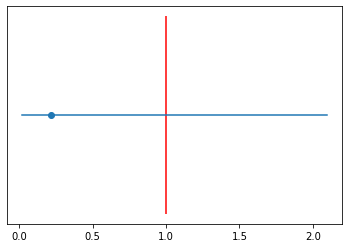

In [69]:
x = np.linspace(ci[0],ci[1])
y = x*0
plt.plot(x,y)
plt.scatter(odds_ratio.loc[idx],0)
plt.vlines(1,-.5,.5,color='red')
plt.tick_params(axis='y',which='both',left=False,labelleft=False)

There does not seem to be an association as the 95% CI for $\omega$ includes 1

w = 0.6333
CI = (0.0951,4.2184)


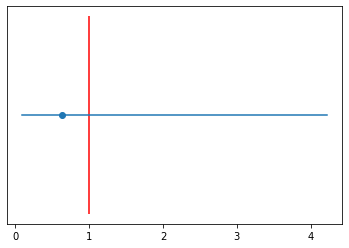

In [78]:
# Calculate Sw for loc[3]
idx = 3
sw = math.sqrt(np.sum(1/np.array([o[idx],(22-np.array(o[idx]))]).T))

# Calculte CI for 'Make your own breakfast'
ci = [odds_ratio.loc[idx]*math.exp(-1.96*sw),odds_ratio.loc[idx]*math.exp(1.96*sw)]

print(f'w = {odds_ratio.loc[idx]:.4f}')
print(f'CI = ({ci[0]:.4f},{ci[1]:.4f})')

x = np.linspace(ci[0],ci[1])
y = x*0
plt.plot(x,y)
plt.scatter(odds_ratio.loc[idx],0)
plt.vlines(1,-.5,.5,color='red')
plt.tick_params(axis='y',which='both',left=False,labelleft=False)

No association is apparent as the CI for $\omega$ includes 1

In [79]:
o

,1,3,10
b14,18.0,19.0,10.0
g14,21.0,20.0,7.0


w = 1.7857
CI = (0.5227,6.1002)


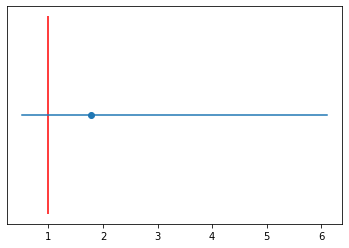

In [80]:
# Calculate Sw for loc[10]
idx = 10
sw = math.sqrt(np.sum(1/np.array([o[idx],(22-np.array(o[idx]))]).T))

# Calculte CI for 'Make your own breakfast'
ci = [odds_ratio.loc[idx]*math.exp(-1.96*sw),odds_ratio.loc[idx]*math.exp(1.96*sw)]

print(f'w = {odds_ratio.loc[idx]:.4f}')
print(f'CI = ({ci[0]:.4f},{ci[1]:.4f})')

x = np.linspace(ci[0],ci[1])
y = x*0
plt.plot(x,y)
plt.scatter(odds_ratio.loc[idx],0)
plt.vlines(1,-.5,.5,color='red')
plt.tick_params(axis='y',which='both',left=False,labelleft=False)

No association apparent as the CI for $\omega$ includes 1

#### Solution

**Make own breakfast:** 

Not all expected counts are ≥ 5 so the results should be treated with caution. <br>
w = 0.214, 95% CI is (0.022, 2.091) <br>
No association is apparent since the 95% CI for ω contains 1. 

**Pick up dirty clothes:**

Not all expected counts are ≥ 5 so the results should be treated with caution.<br>
w = 0.633, 95%C I is (0.095, 4.212)<br>
No association is apparent since the 95% CI for ω contains 1. 

**Wash car:**

All expected counts are ≥ 5<br>
w = 1.786, 95% CI is (0.523, 6.104)<br>
No association is apparent since the 95% CI for ω contains 1. 

### Problem 5

In an article printed in The Sydney Morning Herald on 12 July 1993 the numbers of cash transactions of more than $10,000 were reported as follows.

<table>
    <tr>
        <th rowspan='2'>Cash dealer</th>
        <th colspan='2'>Significant transactions</th>
        <th colspan='2'>Suspect transactions</th>
    </tr>
    <tr>
        <th>1991/92</th>
        <th>1992/93</th>
        <th>1991/92</th>
        <th>1992/93</th>
    </tr>
    <tr>
        <td>Casino</td>
        <td>3868</td>
        <td>4678</td>
        <td>68</td>
        <td>42</td>
    </tr>
    <tr>
        <td>TAB</td>
        <td>1099</td>
        <td>918</td>
        <td>39</td>
        <td>56</td>
    </tr>
    <tr>
        <td>Bookmaker</td>
        <td>602</td>
        <td>396</td>
        <td>0</td>
        <td>0</td>
    </tr>
</table>

 a. Considering only the Casino data, has the number of suspect transactions as a proportion of total cash transactions changed from the 1991/92 financial year to the 1992/93 financial year? (Assume that ‘significant’ cash transactions do not include ‘suspect’ cash transactions.)

$H_0$: Proportion of suspect transactions has not changed

$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

where $O_{ij}$ is the observed count in category $i$ of the determinant and category $j$ of the outcome, and $E_{ij}$ is the corresponding expected count.

$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$

with $v = (r-1)(c-1)$ degrees of freedom.

In [2]:
df = pd.DataFrame({'significant':[3868,4678],'suspect':[68,42]},index=[1991,1992])
df

,significant,suspect
1991,3868,68
1992,4678,42


In [3]:
# Calculate chi-squared
o = df.to_numpy()
o_rt = o.sum(axis=1).reshape(-1,1)
o_ct = o.sum(axis=0)
o_t = o.sum()

e = o_rt*o_ct/o_t
chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=(o.shape[0]-1)*(o.shape[1]-1))

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 12.007474552204986
p value = 0.0005298760971748871


b. Consider the data for the 1992/93 financial year. Is there an association between the type of cash dealer and whether the transaction is suspect? 

$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

where $O_{ij}$ is the observed count in category $i$ of the determinant and category $j$ of the outcome, and $E_{ij}$ is the corresponding expected count.

$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$

with $v = (r-1)(c-1)$ degrees of freedom.

In [12]:
# Calculating chi-squared
o = np.array([[42,56,0],[4678,918,396]])
o_rt = o.sum(axis=1).reshape(-1,1)
o_ct = o.sum(axis=0)
o_t = o.sum()

e = (o_rt*o_ct)/o_t

chi_squared = ((o-e)**2/e).sum()
cp_value = stats.chi2.sf(chi_squared,df=(o.shape[0]-1)*(o.shape[1]-1))

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 127.35612063256585
p value = 0.0005298760971748871


#### Solution

Part a

Ho: the proportion of suspect transactions has not changed between years. 

All expected counts are ≥ 5 

$X_1^2$ = 12.03, 0.0005 < p-value < 0.001 10.5b

Part b

Ho: type of cash dealing and type of transaction are not associated. 

All expected counts are ≥ 5 

$X_2^2$= 127.1, p-value < 0.0005

### Problem 6

A report released by the New South Wales Department of Health claimed that “the campaign to teach parents not to let their babies sleep on their stomachs is believed to have halved the number of deaths from Sudden Infant Death Syndrome (SIDS) in the last two years” (The Sydney Morning Herald. 28 August 1993). In New South Wales in 1990, 185 babies died from SIDS, whilst in 1992, 79 died from the disease. Assess the Department’s claim using the following methods:

$x^2 = \sum_{j=1}^c\frac{(O_j - E_j)^2}{E_j}$

$E_j = n\pi_j$

$v = c-1$

a. a chi-squared goodness-of-fit test;

The proportion of 1990 is double that of 1992. So we assume the proportion in 1990 is $\frac{2}{3}$ and in 1992 is $\frac{1}{3}$.

$H_0: \pi_{90}=\frac{2}{3}, \pi_{92}=\frac{1}{3}$

In [12]:
o = np.array([[185,79]])
e = o.sum()*np.array([[2/3,1/3]])

chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=o.shape[1]-1)

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 1.3806818181818181
p value = 0.23998504304754167


The proportion dieing in 1990 could be double that of 1992

b. a graph showing a 95% confidence interval for the odds ratio, with the null hypothesis value indicated as a vertical dotted line.

(For part b. assume that the populations at risk in 1990 and 1992 are the same, and that both populations are very large.) 

$(we^{-1.96s_w},we^{1.96s_w})$

where

$w = \frac{\frac{a}{c}}{\frac{b}{d}} = \frac{ad}{bc}$

$s_w = \sqrt{\frac{1}{a}+\frac{1}{b}+\frac{1}{c}+\frac{1}{d}}$

which is part of the statistic:

$z = \frac{ln(w)-ln(\omega)}{s_w}$

This is for a 2x2 contingency table:

<table>
    <tr>
        <td></td>
        <td>outcome=1</td>
        <td>outcome=2</td>
        <td>total</td>
    </tr>
    <tr>
        <td>determinant=1</td>
        <td>a</td>
        <td>c</td>
        <td>a+c</td>
    </tr>
    <tr>
        <td>determinant=2</td>
        <td>b</td>
        <td>d</td>
        <td>b+d</td>
    </tr>
    <tr>
        <td>total</td>
        <td>a+b</td>
        <td>c+d</td>
        <td>a+b+c+d</td>
    </tr>
</table>

odds ratio = 2.342
CI = (1.800,3.048)


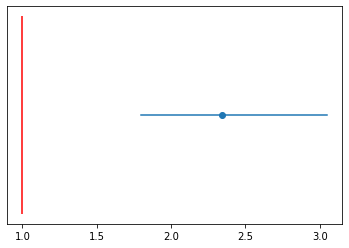

In [44]:
n = 1000000
ct = np.concatenate((o,n-o))

odds = ct[:,0]/ct[:,1]
w = odds[0]/odds[1]
sw = math.sqrt(np.sum(1/ct))

ci = [w*math.exp(-1.96*sw),w*math.exp(1.96*sw)]
print(f'odds ratio = {w:.3f}')
print(f'CI = ({ci[0]:.3f},{ci[1]:.3f})')

x = np.linspace(ci[0],ci[1])
y = 0*x

plt.plot(x,y)
plt.vlines(x=1,ymin=-.5,ymax=.5,color='red')
plt.scatter(x=w,y=0)
plt.tick_params(axis='y',which='both',left=False,labelleft=False)

The CI for $\omega$ does not contain 1 so we can assume there is an association and the proportions between 1990 and 1992 are different.

### Problem 7

To ascertain the level of comprehension of the greenhouse effect, Henderson-Sellers (1990) interviewed persons attending two national meetings on this issue. One of the questions they were asked involved the extent to which they believed that the ozone hole and the greenhouse effect were related. Of 120 attendees who were identified as having an ‘accurate and good scientific understanding’ of the issue, 8.5% said that they believed that the two phenomena were not at all related, 25.5% said that they were slightly related, 35.1% said somewhat related, 27.7% said very related, and 3.2% gave no response. For the other 201 respondents, the corresponding percentages were 2.5, 16.9, 32.8, 43.8, and 4. Is there evidence that the two groups differ in their responses? 

In [49]:
df = pd.DataFrame({'not related':[.085,.025],'slightly related':[.255,.169],
                   'somewhat related':[.351,.328],'very related':[.277,.438],
                   'no response':[.032,.04]},
                  index=['good understanding','other'])
df

,not related,slightly related,somewhat related,very related,no response
good understanding,0.085,0.255,0.351,0.277,0.032
other,0.025,0.169,0.328,0.438,0.040


$H_0$: There is no difference between the responses

$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$

with $v = (r-1)(c-1)$ degrees of freedom.

In [60]:
# Calculate number of respondents
o = np.round(df.to_numpy()*np.array([[120],[201]]))
o_rt = o.sum(axis=1).reshape(-1,1)
o_ct = o.sum(axis=0)
o_t = o.sum()

e = o_ct*o_rt/o_t

chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=(o.shape[0]-1)*(o.shape[1]-1))

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 13.918804056639878
p value = 0.00755875977362911


### Problem 8

Cotton, Antill & Cunningham (1990) sought to derive and determine the usefulness of an index representing mothers’ attachment to the workforce. The proportions of families they targeted from each of three social risk areas were 35% from a ‘low-risk’ group, 27% from a ‘medium-risk’ group, and 38% from a ‘high-risk’ group. In their study of 166 families, it turned out that 68 came from the low-risk group, 48 from the medium-risk group, and the remainder from the high-risk group. Allowing for sampling error, did they achieve their targeted percentages? 

In [61]:
df = pd.DataFrame({'low risk':[68,.35],'medium risk':[48,.27],'high risk':[166-68-48,.38]},\
                  index=['observed actual','expected proportion'])
df

,low risk,medium risk,high risk
observed actual,68.00,48.00,50.00
expected proportion,0.35,0.27,0.38


$H_0: \pi_1 = 0.35, \pi_2 = 0.27, \pi_3 = 0.38$

$x^2 = \sum_{j=1}^c\frac{(O_j - E_j)^2}{E_j}$

$E_j = n\pi_j$

$v = c-1$

In [72]:
o = df.loc['observed actual'].to_numpy()
e = np.round(o.sum()*df.loc['expected proportion'].to_numpy())

chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=o.shape[0]-1)

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 4.606677613574165
p value = 0.09992465701778551


### Problem 9

For the study referred to in Homework Problem 8, the following table shows the outcomes in terms of the numbers of women in various employment classes. 

<table>
    <tr>
        <th rowspan='2'>Current work status</th>
        <th colspan='3'>Work attachment</th>
        <th rowspan='2'>Total</th>
    </tr>
    <tr>
        <th>High</th>
        <th>Moderate</th>
        <th>Low</th>
    </tr>
    <tr>
        <td>Full-time employed</td>
        <td>33</td>
        <td>10</td>
        <td>2</td>
        <td>45</td>
    </tr>
    <tr>
        <td>Part-time employed</td>
        <td>11</td>
        <td>36</td>
        <td>3</td>
        <td>50</td>
    </tr>
    <tr>
        <td>Not employed</td>
        <td>2</td>
        <td>6</td>
        <td>43</td>
        <td>51</td>
    </tr>
    <tr>
        <td>Looking for work</td>
        <td>2</td>
        <td>9</td>
        <td>9</td>
        <td>20</td>
    </tr>
</table>

In [74]:
# Create df of data
df = pd.DataFrame({'high':[33,11,2,2],'moderate':[10,36,6,9],'low':[2,3,43,9]},
                  index=['full-time','part-time','not employed','looking'])
df

,high,moderate,low
full-time,33,10,2
part-time,11,36,3
not employed,2,6,43
looking,2,9,9


a. On the basis of this sample are the percentages of people falling into the three levels of work attachment the same?

$H_0: \pi_1=\pi_3=\pi_3=\frac{1}{3}$

$x^2 = \sum_{j=1}^c\frac{(O_j - E_j)^2}{E_j}$

$E_j = n\pi_j$

$v = c-1$ 


In [95]:
# Calculate whether proportions in group are equal in all groups
o = df.to_numpy()
o_ct = o.sum(axis=0)
o_t = o.sum()
pi=1/3
e = o_t*1/3

chi_squared = ((o_ct-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=o_ct.shape[0]-1)

print(f'x2 = {chi_squared:.3f}')
print(f'p value = {p_value:.3f}')

x2 = 1.602
p value = 0.449


b. Analyse the data to test if work attachment is independent of work status.

$H_0$: work attachment is independent from work status

$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$

$v = (r-1)(c-1)$

In [102]:
# Calculate whether the categories are related or are independent
o_rt = o.sum(axis=1).reshape(-1,1)
e = o_ct*o_rt/o_t

chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=(o.shape[0]-1)*(o.shape[1]-1))

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 134.71199941821234
p value = 1.3070049194695263e-26


c. Display the data using an appropriate plot of odds ratios. 

In [166]:
# Create list of combinations of 2 by 2 matrices
rows = [i for i in itertools.combinations(range(4),2)]
cols = [i for i in itertools.combinations(range(3),2)]
combs = [[r,c] for r in rows for c in cols]
fc = [list(sum(i,())) for i in combs]

In [203]:
# Calculate odds ratios for 2 by 2 matrices
x = ['full-time','part-time','not employed','looking']
y = ['high','moderate','low']

odds_ci = {}

for i in fc:
    a,b,c,d = i
    nm = o[[[a],[b]],[c,d]]
    odds = nm[:,0]/nm[:,1]
    odds_ratio = odds[0]/odds[1]
    sw = math.sqrt(np.sum(1/nm))
    ci = [odds_ratio*math.exp(-1.96*sw),odds_ratio*math.exp(1.96*sw)]
    odds_ci[f'{x[a]},{x[b]}/{y[c]},{y[d]}'] = {
        'matrix':nm,
        'odds':odds,
        'odds_ratio':odds_ratio,
        'sw':sw,
        'ci':ci
    }    

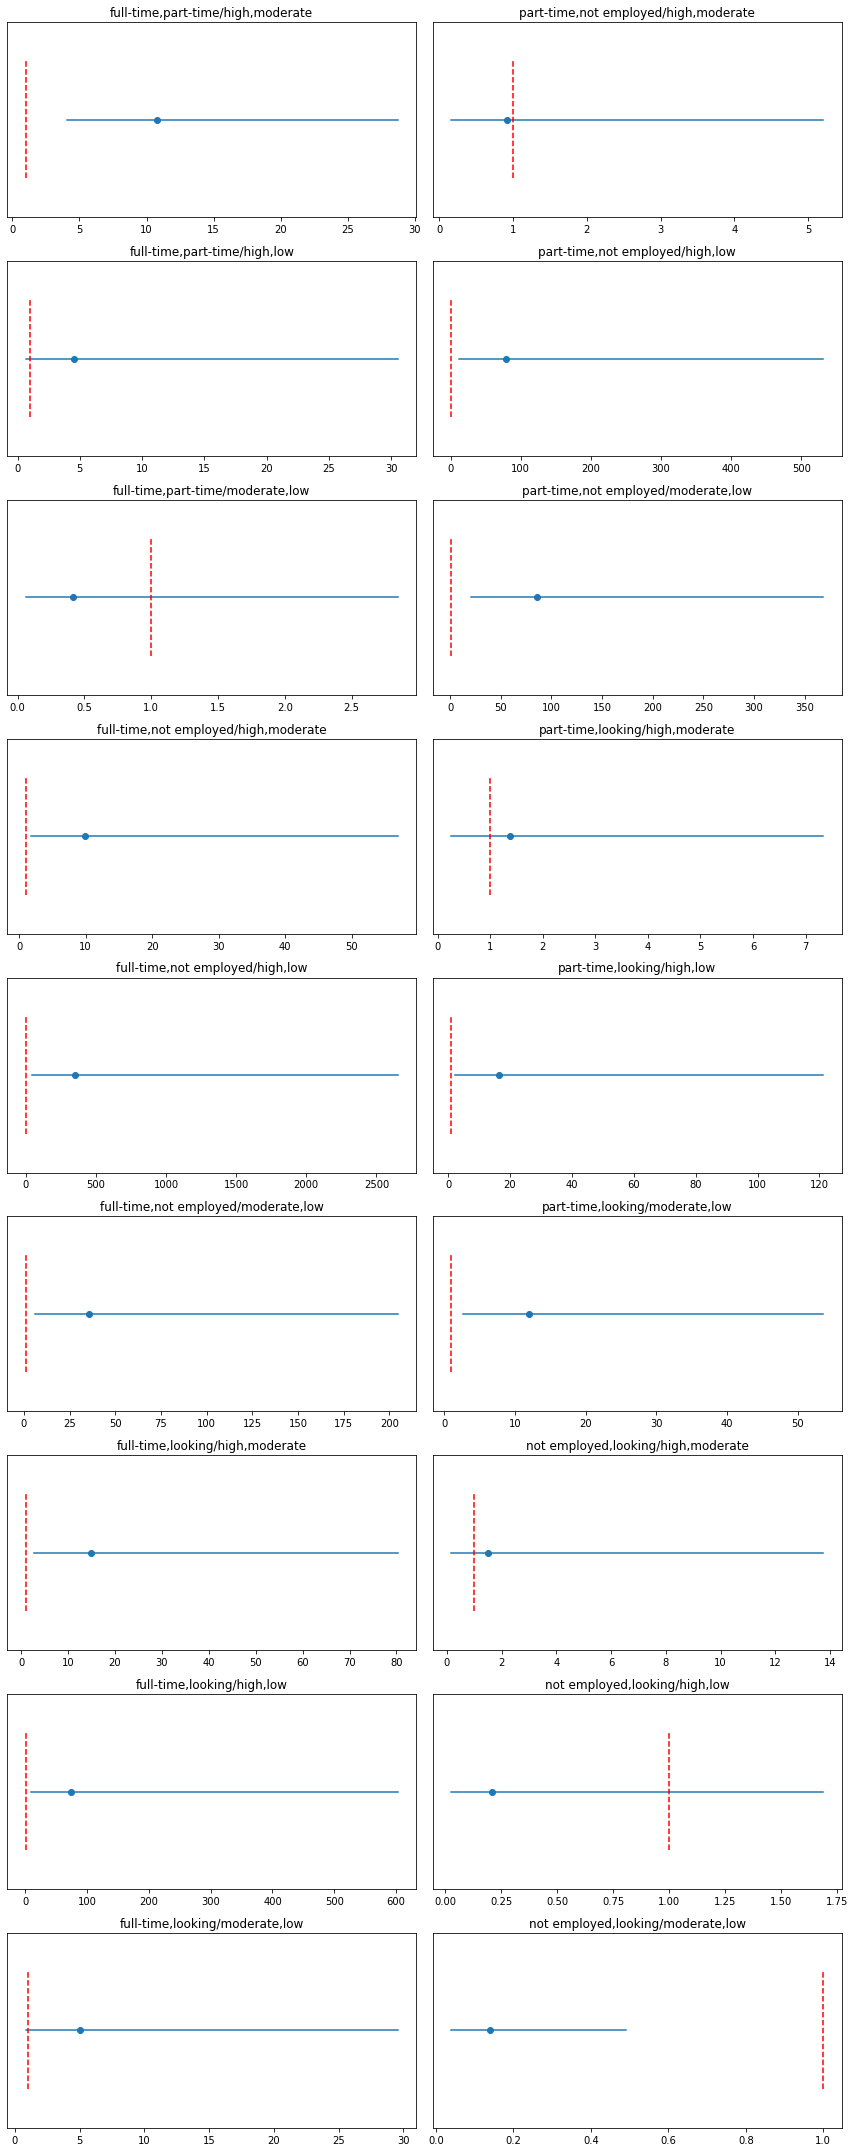

In [255]:
# Plot odd ratios
x,y = np.array(list(odds_ci.keys())).reshape(9,-1).shape
fig, ax = plt.subplots(x,y,figsize=(12,30))

px,py = 0,0
for k,v in odds_ci.items():
    ax[px,py].set_title(k)
    x = np.linspace(v['ci'][0],v['ci'][1])
    y = 0*x
    ax[px,py].plot(x,y)
    ax[px,py].axvline(x=1,ymin=0.2,ymax=0.8,color='red',ls='--')
    ax[px,py].scatter(v['odds_ratio'],0)
    ax[px,py].tick_params(axis='y',which='both',left=False,labelleft=False)
    px+=1
    if px>8:
        px=0
        py=1
plt.tight_layout()

### Problem 10

Pagano & Gauvreau (1993, page 133) cited data for 6,168 women who participated in the first U.S. National Health and Nutrition Examination Survey. The outcome variable of interest was whether or not the woman had developed breast cancer, and the determinant of interest was whether or not she had given birth to a child before age 25. Of 96 women who had developed breast cancer, 65 had given birth before age 25, while 4,475 of the women who had not developed breast cancer had given birth before age 25.

In [9]:
df = pd.DataFrame({'cancer':[65,96-65],'healthy':[4475,6168-4475-96]},index=['b25','oa25'])
df

,cancer,healthy
b25,65,4475
oa25,31,1597


a. Test the null hypothesis of no association. 

$x^2 = \sum_{i=1}^r\sum_{j=1}^c\frac{(O_{ij}-E_{ij})^2}{E_{ij}}$

$E_{ij} = \frac{\sum_{j=1}^cO_{ij}\sum_{i=1}^rO_{ij}}{n}$

with $v = (r-1)(c-1)$ degrees of freedom.

In [16]:
# Calculate chi-squared
o = df.to_numpy()
o_rt = o.sum(axis=1).reshape(-1,1)
o_ct = o.sum(axis=0)
o_t = o.sum()

e = o_ct*o_rt/o_t

chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=(o.shape[0]-1)*(o.shape[1]-1))

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 1.745740091613836
p value = 0.18641315964351843


In [17]:
# Test assumptions: expected count in contingency table >=5
e>5

array([[ True,  True],
       [ True,  True]])

b. Graph the result as an odds ratio, with a 95% confidence interval. 

$(we^{-1.96s_w},we^{1.96s_w})$

where

$w = \frac{\frac{a}{c}}{\frac{b}{d}} = \frac{ad}{bc}$

$s_w = \sqrt{\frac{1}{a}+\frac{1}{b}+\frac{1}{c}+\frac{1}{d}}$

This is for a 2x2 contingency table:

<table>
    <tr>
        <td></td>
        <td>outcome=1</td>
        <td>outcome=2</td>
        <td>total</td>
    </tr>
    <tr>
        <td>determinant=1</td>
        <td>a</td>
        <td>c</td>
        <td>a+c</td>
    </tr>
    <tr>
        <td>determinant=2</td>
        <td>b</td>
        <td>d</td>
        <td>b+d</td>
    </tr>
    <tr>
        <td>total</td>
        <td>a+b</td>
        <td>c+d</td>
        <td>a+b+c+d</td>
    </tr>
</table>

In [20]:
# Calculate confidence interval for omega
odds = o[:,0]/o[:,1]
w = odds[0]/odds[1]
sw = math.sqrt(np.sum(1/o))

ci = [w*math.exp(-1.96*sw),w*math.exp(1.96*sw)]
print(f'odds ratio = {w}')
print(f'CI = {ci}')

odds ratio = 0.7482789691836367
CI = [0.48597871399424925, 1.1521521408222657]


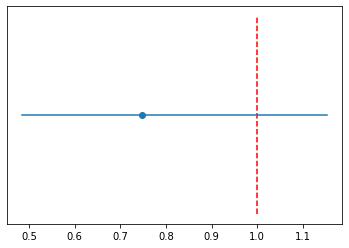

In [23]:
x = np.linspace(ci[0],ci[1])
y = 0*x

plt.plot(x,y)
plt.scatter(w,0)
plt.vlines(1,ymin=-0.5,ymax=0.5,color='red',ls='--')
plt.tick_params(axis='y',which='both',left=False,labelleft=False)

c. State your conclusion in words. 

The test performed did not provide enough evidence to conclude there is a difference between the groups. this was also supported by the odds ratio where the 95% confidence interval of $\omega$ includes 1. We can conclude that there is not association between the age of the mother at the birth of the first child and breast cancer.

### Problem 11

MacArthur (1931) gave data from a genetics experiment of tomato plants involving a dihybrid cross where the expected ratio of the four phenotypes listed is 9:3:3:1 (assuming no linkage). The numbers of offspring observed were as follows: 

<table>
    <tr>
        <th>Phenotype</th>
        <th>Frequency</th>
    </tr>
    <tr>
        <td>Tall cut-leaf</td>
        <td>926</td>
    </tr>
    <tr>
        <td>Tall, potato-leaf</td>
        <td>288</td>
    </tr>
    <tr>
        <td>Dwarf, cut-leaf</td>
        <td>293</td>
    </tr>
    <tr>
        <td>Dwarf, potato-leaf</td>
        <td>104</td>
    </tr>
    <tr>
        <td>Total</td>
        <td>1611</td>
    </tr>
</table>

Use a chi-squared goodness of fit test to compare the observed frequencies with the genetic theory. 

The expected proportions are:

$H_0: \pi_{tc}=\frac{9}{16},\pi_{tp}=\frac{3}{16},\pi_{dc}=\frac{3}{16},\pi_{dp}=\frac{1}{16}$

$x^2 = \sum_{j=1}^c\frac{(O_j - E_j)^2}{E_j}$

$E_j = n\pi_j$

$v = c-1$

In [28]:
# Calculate chi-squred
o = np.array([926,288,294,104])
pi = np.array([9/16,3/16,3/16,1/16])
e = o.sum()*pi

chi_squared = ((o-e)**2/e).sum()
p_value = stats.chi2.sf(chi_squared,df=o.shape[0]-1)

print(f'x2 = {chi_squared}')
print(f'p value = {p_value}')

x2 = 1.4105321202095393
p value = 0.7030678113652238


In [32]:
# Check assumptions for expected proportions n*pi >=5
e>=5

array([ True,  True,  True,  True])

In [33]:
# Check assumptions for expected proportions n(1-pi) >=5
(o*(1-pi))>=5

array([ True,  True,  True,  True])